In [29]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\ayael\Documents\bank\bank-full.csv", delimiter=';')
data.columns = data.columns.str.replace('"', '')
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [30]:

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))  
        label_encoders[column] = le


X = data.drop('y', axis=1)
y = data['y']               


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree Classifier with a maximum depth to control the size
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=10, min_samples_leaf=5)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.24      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043

Confusion Matrix:
[[7769  183]
 [ 833  258]]


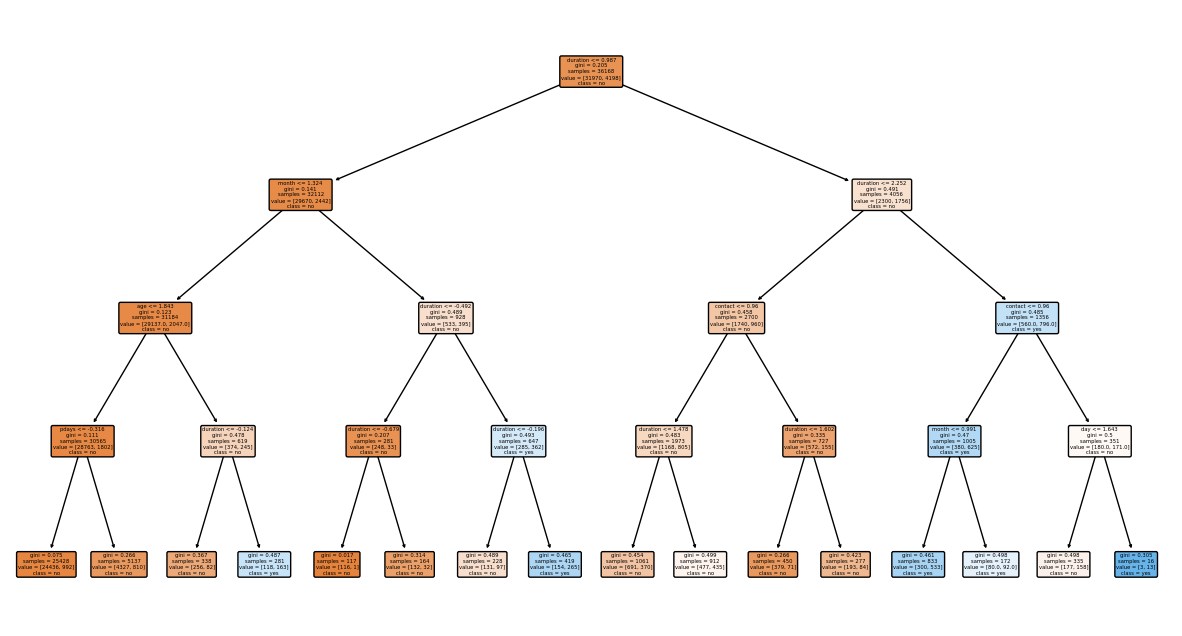

In [31]:
plt.figure(figsize=(15,8))  
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

In [32]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
print(feature_importance_df.sort_values(by="Importance", ascending=False))


      Feature  Importance
11   duration    0.680324
10      month    0.138077
0         age    0.080303
13      pdays    0.070203
8     contact    0.029024
9         day    0.002070
1         job    0.000000
2     marital    0.000000
3   education    0.000000
4     default    0.000000
5     balance    0.000000
6     housing    0.000000
7        loan    0.000000
12   campaign    0.000000
14   previous    0.000000
15   poutcome    0.000000
